# Report 

Tanmay Khabia 2018102038

Shantanu Agrawal 2018102040

Code and rest of the data 
https://iiitaphyd-my.sharepoint.com/:f:/g/personal/tanmay_khabia_students_iiit_ac_in/EtZg_Vo7IcxOrTvSsLlFgyQB9OmUUDo0Lkk3Q2uWxG6EHw?e=V3t9Ns


# RRT holonomic 

- In this we implemented basic rrt algorithm. In this the robot can move in any direction and can switch direction at any node.

- The holonomic robot was assumed to be spherical in shape so the wheel trajectory and the trajectory of the centre of mass of the robot to be the same. so only single viedo is present in the folder holonomic.

- To create obstical we first created a 600 * 600 grid and added obsticals as black patches in the white pixel array. 
    - Now to make robot point size we have to increase the size of the obstical to configuration block. To do that we need to find the locus of the center of the robot when it is moved around the obstical and is just touching it. 
    - This can be obtained by using erosion of the white space using a circular kernel of diameter  = the radius of the robot.  
- For obstical detection we travel the path step by step and see if the color of that pixel is black and if we encounter black pixel we do not add the node and continue the algorithm. 


The algo of rrt was 

while iter < N:

    randomnode = getrandomnode () 
    
    parent =getclosestparentnode(rrtT , randomnode )

    generatenewclosestnodefromparentnode(parent , randomnode)
    
    if checkobstical(x_new, y_new, erosion, parentind):
    
        continue

    insertnodeingraph()

    if goalreached(rrt):
    
        break
        
    iter += 1
    
centre of mass path and wheel trajectory

![603.png](603.png)


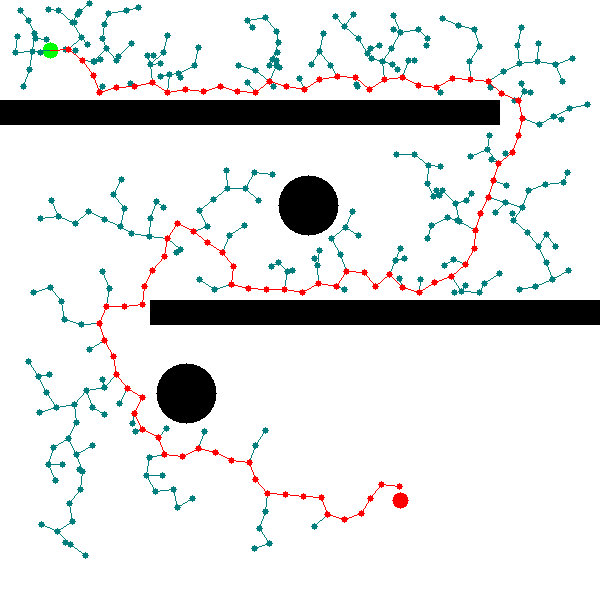

## RRT Non Holonomic

- Now this was a tricky implementation as we have to introduce the kinematics of the non holonomic robot and the constaint that we have to consider the direction of the robot , the steering angle , velocity etc.
- To get the motion trajectory we use integration 

$$ dx = v * cos(\theta)*dt  \\ dy = v *sin(\theta) * dt \\ d\theta = (v/l ) * tan(steering angle)*dt $$ 

where v = velocity of the robot , $l$ = length of the robot 

To measure the distance we now have to consider the theta term.
$$ d(p, q ) = \sqrt {(p.x - q.x) ^2 + (p.y - q.y) ^2 + (180/\pi * min (p.\theta - q.\theta ,p.\theta - q.\theta + \pi,p.\theta - q.\theta  - \pi))^2  }$$ 

- It is assumed that the vehical can move forward and backward. The rest of the implementation is simmilar to the RRT for holonomic case.
- Here even though the robot is rectangular we assume the robot to be circular with diameter = $ \sqrt{l^2 + w^2 }$ and according to this size the CB are generated.

Centre of mass trajectory 

![./1003.png](1003.png)

wheel trajectory 

![./600.png](600.png)
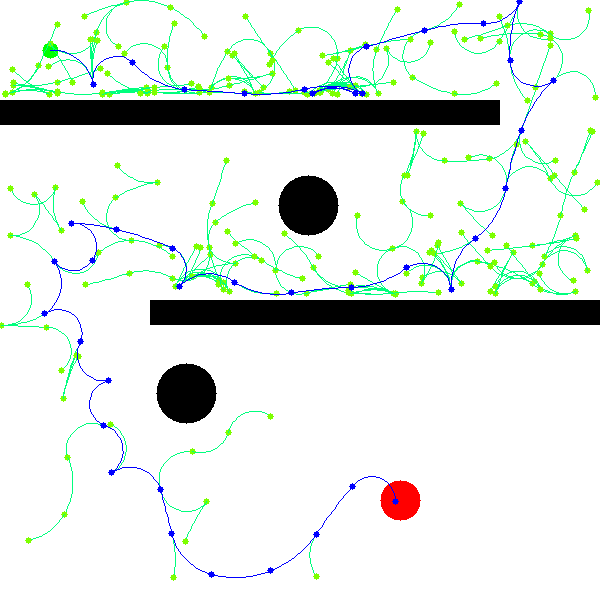
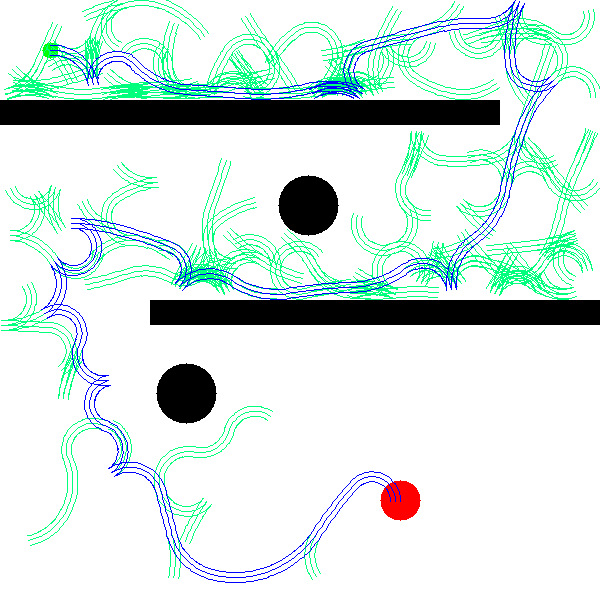

# Who did what 

### Tanmay Khabia -

- Made this report 
- coded rrt.py makefloor.py rrt_non_holonomic.py except  getdistance and goal_reached function in both the rrt and rrt_nonholonomic
- Modified combine.py for general use.

### Shantanu Agrawal  

- Wrote getdistance and goal_reached function in both the rrt and rrt_nonholonomic 
- Helped in debugging of the code.
- Function to clear all image files before running rrt so that no previous images are used in video making.
